In [1]:
#doing the necessary imports
import pandas as pd
import pandas_profiling
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import csv
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Analysis of the data

In [5]:
pandas_profiling.ProfileReport(df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


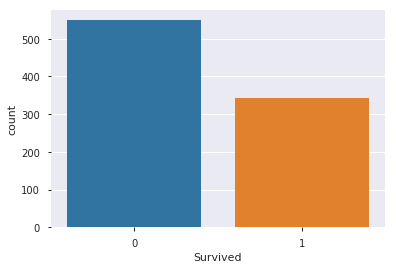

In [7]:
sns.countplot(x='Survived', data= df)

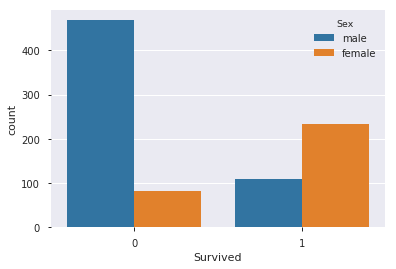

In [8]:
sns.countplot(x='Survived',hue='Sex', data= df)

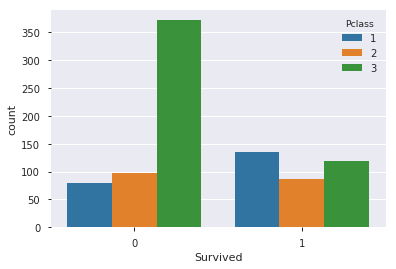

In [9]:
sns.countplot(x='Survived',hue='Pclass', data= df)

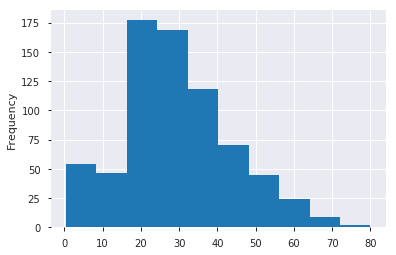

In [10]:
df['Age'].plot.hist()

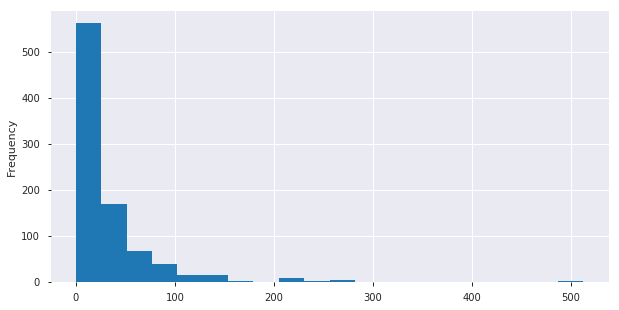

In [11]:
df['Fare'].plot.hist(bins=20, figsize=(10,5))

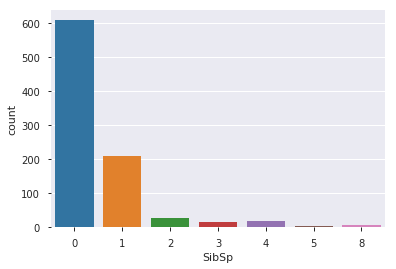

In [12]:
sns.countplot(x='SibSp' , data=df)

## Data Wrangling

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

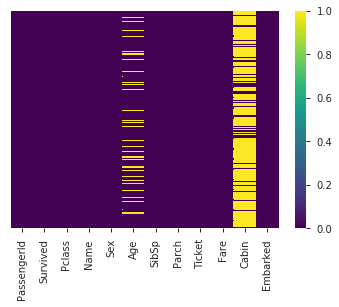

In [14]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')

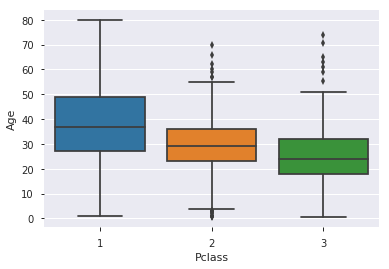

In [15]:
sns.boxplot(x='Pclass', y = 'Age', data=df)

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df.drop("Cabin", axis=1, inplace=True)

In [18]:
df.dropna(inplace=True)

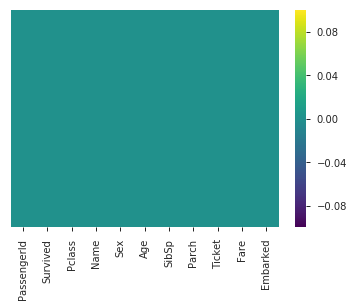

In [19]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')

In [20]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [21]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [22]:
sex= pd.get_dummies(df['Sex'], drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [23]:
embark = pd.get_dummies(df['Embarked'], drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [24]:
pcl = pd.get_dummies(df['Pclass'], drop_first=True)
pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [25]:
final_df = pd.concat([df, sex, embark, pcl], axis=1)

In [26]:
final_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [27]:
final_df.drop(['PassengerId','Pclass','Name','Sex','Ticket','Embarked'], axis=1, inplace=True)

In [28]:
final_df.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


## Train Data

In [29]:
X = final_df.drop('Survived', axis=1)
y =final_df['Survived']

In [30]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [32]:
print(len(X_train))
print(len(X_test))

477
235


## Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
logmodel = LogisticRegression()

In [35]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [36]:
predictions = logmodel.predict(X_test)

In [37]:
from sklearn.metrics import classification_report

In [38]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.82      0.83      0.83       139\n           1       0.75      0.73      0.74        96\n\n   micro avg       0.79      0.79      0.79       235\n   macro avg       0.78      0.78      0.78       235\nweighted avg       0.79      0.79      0.79       235\n'

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
confusion_matrix(y_test,predictions)

array([[116,  23],
       [ 26,  70]])

In [41]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import *

In [42]:
accuracy_score(y_test,predictions)*100

79.14893617021276

## Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)
y_pred_rfc = random_forest_classifier.predict(X_test)

In [45]:
confusion_matrix(y_test,y_pred_rfc)

array([[117,  22],
       [ 32,  64]])

In [46]:
accuracy_score(y_test,y_pred_rfc)*100

77.02127659574468

## XGBoost Model Classifier

In [47]:
from xgboost import XGBClassifier

In [48]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train,y_train)
y_pred_xgb = xgb_classifier.predict(X_test)

In [49]:
confusion_matrix(y_test,y_pred_xgb)

array([[121,  18],
       [ 27,  69]])

In [50]:
accuracy_score(y_test,y_pred_xgb)*100

80.85106382978722

In [51]:
y_pred_proba = xgb_classifier.predict_proba(X_test)

In [52]:
pos_proba = y_pred_proba[:,1]

In [53]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)

In [54]:
# import matplotlib as mpl
# mpl.rcParams['figure.dpi'] = 400 #for clear crisp graphs for presentations

Text(0.5, 1.0, 'ROC curve')

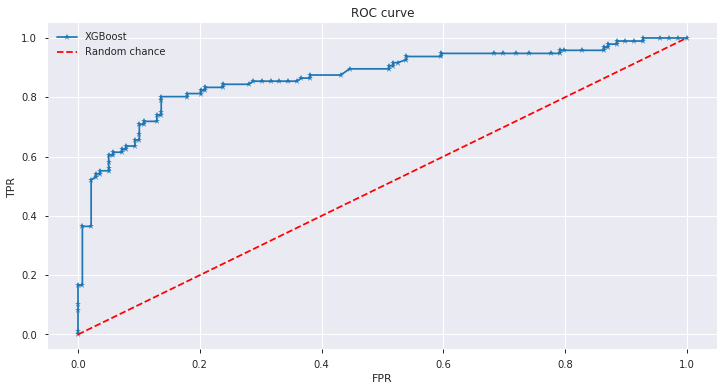

In [74]:
fig= plt.figure(figsize=(12,6))
plt.plot(fpr, tpr, '*-') #use stars on where data points are located
plt.plot([0, 1], [0, 1], 'r--')  #plot a line from 0,0 to 1,1 and color red dotted
plt.legend(['XGBoost', 'Random chance']) 
plt.xlabel('FPR') 
plt.ylabel('TPR') 
plt.title('ROC curve')

In [56]:
metrics.roc_auc_score(y_test, pos_proba)  #checking the area under curve to assess model performance

0.8681429856115108

In [57]:
thresholds

array([1.9863288 , 0.9863288 , 0.96318895, 0.9590238 , 0.9460631 ,
       0.945598  , 0.9050532 , 0.88949656, 0.7708304 , 0.76003546,
       0.7530458 , 0.7356346 , 0.7319837 , 0.7163697 , 0.7157245 ,
       0.7007318 , 0.67944974, 0.6790306 , 0.6505315 , 0.6336828 ,
       0.6328796 , 0.6323546 , 0.6275186 , 0.60896003, 0.5932599 ,
       0.57914025, 0.57909524, 0.5562162 , 0.5560488 , 0.5495322 ,
       0.5054823 , 0.46655133, 0.46262515, 0.45318237, 0.4268287 ,
       0.4268255 , 0.3835448 , 0.3832972 , 0.35638484, 0.35328296,
       0.3530678 , 0.3300477 , 0.2946041 , 0.28958824, 0.26215875,
       0.2554506 , 0.24965139, 0.22769277, 0.21894862, 0.21322042,
       0.19912133, 0.19718081, 0.19218096, 0.1909088 , 0.17705975,
       0.16901202, 0.15212946, 0.14777029, 0.14460887, 0.14371528,
       0.13913551, 0.13843851, 0.13754281, 0.12491375, 0.12224864,
       0.10129914, 0.10129793, 0.08836924, 0.08735932, 0.08015453,
       0.07842729, 0.07712658, 0.07632402, 0.0750748 , 0.06504

In [58]:
thresholds[np.argmax(tpr - fpr)] #getting ideal threshold for the above model

0.4268255

In [59]:
def CMatrix(CM, labels=['not survived','survived']):
    df = pd.DataFrame(data = CM, index=labels, columns =labels)
    df.index.name='TRUE'
    df.columns.name='PREDICTION'
    df.loc['Total']=df.sum()
    df['Total'] = df.sum(axis=1)
    return df

In [60]:
y_pred_proba = xgb_classifier.predict_proba(X_test)[:,1]
y_pred_test = (y_pred_proba >= 0.426).astype('int') #use ideal threshold here
#confusion Matrix
CM = confusion_matrix(y_pred = y_pred_test, y_true=y_test)
print('Recall: ', 100*recall_score(y_pred=y_pred_test, y_true=y_test))
print('Precision: ', 100*precision_score(y_pred=y_pred_test, y_true=y_test))
CMatrix(CM)

Recall:  80.20833333333334
Precision:  80.20833333333334


PREDICTION,not survived,survived,Total
TRUE,,,
not survived,120,19,139
survived,19,77,96
Total,139,96,235


In [61]:
accuracy_score(y_test,y_pred_test)*100 #accuracy after getting best threshold from ROC curve

83.82978723404256

## Trying to get the best model & hyper parameters. Should happen before modelling

In [63]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline 
from sklearn.svm import SVC

pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])

In [ ]:
#choosing between standard scaler and minmax scaler to see which one does well
param_grid = [ {'classifier': [SVC()], 'preprocessing': [StandardScaler(), MinMaxScaler()], 
                'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100], 
                'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]}, 
              {'classifier': [XGBClassifier(n_estimators=100)], 
               'preprocessing': [None],'classifier__learning_rate':[0.001, 0.01, 0.1], 'classifier__max_depth': [1, 2, 3]}]

In [ ]:
grid = GridSearchCV(pipe, param_grid, cv=5) 
grid.fit(X_train, y_train) 
print("Best params:\n{}\n".format(grid.best_params_)) 
print("Best cross-validation score: {:.2f}".format(grid.best_score_)) 
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

In [ ]:
xgb_classifier   #see that xgb's default parameters are already pretty good, which we used

## Correlations

In [64]:
final_df.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [69]:
corr = final_df.corr() ##this type is suited for linear regression. For classification use ANOVA F-test 
corr

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
Survived,1.000000,-0.082446,-0.015523,0.095265,0.266100,-0.536762,-0.048966,-0.159015,0.086891,-0.335364
Age,-0.082446,1.000000,-0.307351,-0.187896,0.093143,0.099037,-0.021693,-0.025431,0.009214,-0.309944
SibSp,-0.015523,-0.307351,1.000000,0.383338,0.139860,-0.106296,0.051331,0.018968,-0.052570,0.077060
Parch,0.095265,-0.187896,0.383338,1.000000,0.206624,-0.249543,-0.009417,0.013259,-0.018558,0.027750
Fare,0.266100,0.093143,0.139860,0.206624,1.000000,-0.182457,-0.062346,-0.250994,-0.140246,-0.402219
male,-0.536762,0.099037,-0.106296,-0.249543,-0.182457,1.000000,-0.027256,0.109078,-0.075347,0.158446
Q,-0.048966,-0.021693,0.051331,-0.009417,-0.062346,-0.027256,1.000000,-0.378859,-0.080929,0.145087
S,-0.159015,-0.025431,0.018968,0.013259,-0.250994,0.109078,-0.378859,1.000000,0.168577,0.093140
2,0.086891,0.009214,-0.052570,-0.018558,-0.140246,-0.075347,-0.080929,0.168577,1.000000,-0.564948
3,-0.335364,-0.309944,0.077060,0.027750,-0.402219,0.158446,0.145087,0.093140,-0.564948,1.000000


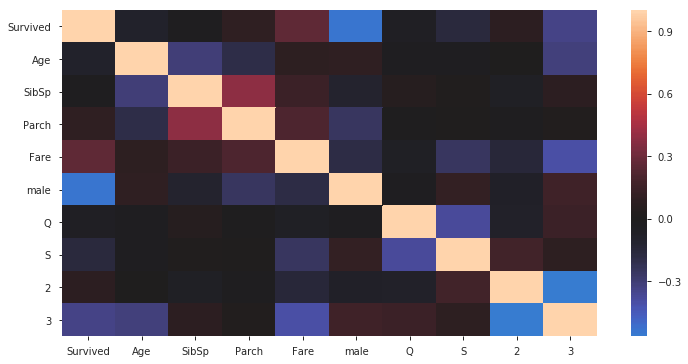

In [75]:
fig= plt.figure(figsize=(12,6))
sns.heatmap(corr, 
           xticklabels= corr.columns.values,
           yticklabels = corr.columns.values,
           center=0)

## Doing Correlation for a classification task manually

In [88]:
final_df.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [92]:
feat_responses = final_df.columns.tolist()
feat_responses

['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S', 2, 3]

In [78]:
X.shape

(712, 9)

In [79]:
y.shape

(712,)

In [83]:
X = X.values
y = y.values

In [85]:
print(X.shape, y.shape)

(712, 9) (712,)


In [87]:
from sklearn.feature_selection import f_classif
[f_stat, f_p_value] = f_classif(X, y)

In [93]:
#plot a df showing F statistic and P value. So you can see it manually
f_test_df = pd.DataFrame({'Feature':feat_responses[1:], 
                          'F statistic':f_stat, 
                          'p value':f_p_value}) 

f_test_df.sort_values('p value')

,Feature,F statistic,p value
4,male,287.349355,2.242852e-54
8,3,89.972256,3.556879e-20
3,Fare,54.105548,5.256796e-13
6,S,18.418724,2.019203e-05
2,Parch,6.502602,1.098061e-02
7,2,5.401363,2.040235e-02
0,Age,4.859127,2.782032e-02
5,Q,1.706443,1.918705e-01
1,SibSp,0.171126,6.792381e-01


## Doing ANOVA automatically to get important features

In [103]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif

selector = SelectPercentile(f_classif, percentile=50) #select top 50% of best features
selector.fit(X,y) #rem X,y are numpy arrays because we took values only

SelectPercentile(percentile=50,
         score_func=<function f_classif at 0x128225158>)

In [98]:
best_feature_ix = selector.get_support()
best_feature_ix

array([False, False, False,  True,  True, False,  True, False,  True])

In [99]:
features  = feat_responses[1:]

In [100]:
best_features  = [features[counter] for counter in range(len(features)) 
                 if best_feature_ix[counter]]

In [102]:
best_features #as you can see the manual and automatic selectio all agree on top 50% features

['Fare', 'male', 'S', 3]